 # Изучение закономерностей, определяющих успешность игр

**Описание проекта**

Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). 

Цель - выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

Представлены данные до 2016 года. Представим, что сейчас декабрь 2016 год, и мы планируем кампанию на 2017-й. 

**Описание данных**

`Name` — название игры

`Platform` — платформа

`Year_of_Release` — год выпуска

`Genre` — жанр игры

`NA_sales` — продажи в Северной Америке (миллионы проданных копий)

`EU_sales`— продажи в Европе (миллионы проданных копий)

`JP_sales` — продажи в Японии (миллионы проданных копий)

`Other_sales` — продажи в других странах (миллионы проданных копий)

`Critic_Score` — оценка критиков (максимум 100)

`User_Score` — оценка пользователей (максимум 10)

`Rating` — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.


**План работы:**

- [выполнить предобработку данных](#preprocessing)
- [провести исследовательский анализ данных](#researches)
- [составить портрет пользователя каждого региона](#portrait)
- [проверить гипотезы](#hypothesis)
- [сделать выводы](#conclusion)

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib as mpl 
import matplotlib.pyplot as plt 
from scipy import stats as st

plt.style.use('seaborn-darkgrid')
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('C:/Users/belle/OneDrive/Документы/датасеты/games.csv')

## Обзор данных

Рассмотрим в каком виде представлена таблица и подробную информацию по ней

In [3]:
df.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


В датасете 16715 строк, 11 колонок

Много пропусков в столбцах `Critic_Score`, `User_Score`, `Rating`, также есть пропуски в `Name` и `Year_of_Release`. Не все столбцы приведены к нужному типу данных.

## Подготовка данных <a id='preprocessing'></a> 

Приведем названия столбцов к общепринятому стилю

In [5]:
df.columns = df.columns.str.lower() 

Проверим на наличие дубликатов

In [6]:
df[df.duplicated()] 

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating


In [7]:
df['genre'].unique() 

array(['Sports', 'Platform', 'Racing', 'Role-Playing', 'Puzzle', 'Misc',
       'Shooter', 'Simulation', 'Action', 'Fighting', 'Adventure',
       'Strategy', nan], dtype=object)

In [8]:
df['platform'].unique() 

array(['Wii', 'NES', 'GB', 'DS', 'X360', 'PS3', 'PS2', 'SNES', 'GBA',
       'PS4', '3DS', 'N64', 'PS', 'XB', 'PC', '2600', 'PSP', 'XOne',
       'WiiU', 'GC', 'GEN', 'DC', 'PSV', 'SAT', 'SCD', 'WS', 'NG', 'TG16',
       '3DO', 'GG', 'PCFX'], dtype=object)

Дубликаты не обнаружены

In [9]:
df['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

Помимо чисел и пропусков есть значение "tbd". Tbd означает "To Be Determined". Заменим это значение на пропуск (NaN)

In [10]:
df['user_score'] = df['user_score'].replace('tbd', np.NaN)

В столбцах `year_of_release` и `critic_score` поменяем тип данных с float на int, так как там целочисленные значения

В `user_score` поменяем тип данных с object на float, так как там числовые дробные значения

In [11]:
df['year_of_release'] = df['year_of_release'].astype('Int64') #изменим тип данных
df['critic_score'] = df['critic_score'].astype('Int64')
df['user_score'] = df['user_score'].astype('float')

Изучим пропуски

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  Int64  
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   Int64  
 9   user_score       7590 non-null   float64
 10  rating           9949 non-null   object 
dtypes: Int64(2), float64(5), object(4)
memory usage: 1.4+ MB


Посмотрим на строки, в которых пропущено название игры

In [13]:
 df.query('name.isna()')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993,NaN,1.78,0.53,0.00,0.08,<NA>,NaN,NaN
14244,NaN,GEN,1993,NaN,0.00,0.00,0.03,0.00,<NA>,NaN,NaN


Уберем строки, в которых есть пропуски в названии игры, так как теряется весь смысл строки. К тому же в этих строках много пропусков в других колонках

In [14]:
df = df.query('~name.isna()') 

Рассмотрим пропуски в других столбца 

Найдем количество строк, в которых пропущен год выпуска и посчитаем какой процент они составляют от всех строк

In [15]:
columns = ['year_of_release', 'critic_score', 'user_score', 'rating']
for e in columns:
    passes = len(df[df[e].isna()])
    print('{:.1%}'.format(passes / df.shape[0]), 'процентов составляют строки, в которых пропущено значение', e)

1.6% процентов составляют строки, в которых пропущено значение year_of_release
51.3% процентов составляют строки, в которых пропущено значение critic_score
54.6% процентов составляют строки, в которых пропущено значение user_score
40.5% процентов составляют строки, в которых пропущено значение rating


Допустимо удалить только те строки, в которых нет года выпуска, для других значений слишком большой процент

In [16]:
df = df.query('~year_of_release.isna()') 

В столбце с рейтингом от организации ESRB пропущено 40.5% значений. Стоит учесть, что этот рейтинг для игр ставится только в  США и Канаде. Поэтому лучше поставим зашглушку - слово 'missed'


In [17]:
df['rating'] = df['rating'].fillna('missed')

В итоге в столбце:

`name` - 2 пропуска, их удалили

`year_of_release` - 269 пропусков (1,6% от всего датафрейма), удалили эти строки

`critic_score`, `user_score` - оставили пропуски, так как их очень много и логическим способом заполнить пропуски нельзя

`rating` - поставили заглушку (слово 'missed')


Для дальнейшего анализа добавим еще один столбец `total_sales`, в нем записана сумма продаж во всех регионах

In [18]:
df['total_sales'] = df[['na_sales','eu_sales','jp_sales', 'other_sales']].sum(axis = 1)

In [19]:
df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,<NA>,NaN,missed,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,<NA>,NaN,missed,31.38


Датафрейм готов к работе. Мы очистили и привели в порядок данные, а именно:
- проверили датасет на явные и неявные дубликаты
- удалили строки, где есть пропуски в названии или в годе выпуска, поставили заглушку в столбце с рейтингом
- привели названия столбцов к нижнему регистру
- заменили tbd на None, так как это означает, что рейтинг еще не сформирован
- изменили типы данных в столбцах `year_of_release`, `critic_score` и `user_score`
- добавили столбец с суммарными продажами во всех регионах

## Исследовательский анализ данных 

### Проведем анализ рассматриваемого периода

Посмотрим, сколько игр выпускалось в разные годы

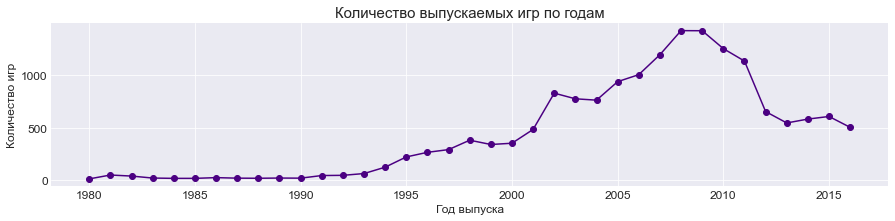

In [20]:
quantity_year = df.groupby('year_of_release')['name'].count() #группировка игр по годам

plt.figure(figsize=(15,3))
plt.plot(quantity_year, 'o-', color = 'indigo')
plt.title('Количество выпускаемых игр по годам', fontsize = 15)
plt.xlabel('Год выпуска', fontsize = 12)
plt.ylabel('Количество игр', fontsize = 12)
plt.tick_params(axis='both', which='major', labelsize=12)
plt.show()

Начиная с 1995 в прокат стало выходить более 200 игр в год

Пик популярности приходится на 2008-2009 год, после график идет на спад

Для последующего анализа данных будем использовать игры, выпущенные не ранее 1995 года, так как именно в это время игры набирают свою популярность

In [21]:
df = df[df['year_of_release'] > 1994]

### Проанализируем платформы 

Выведем топ самых популярных платформ (считая по сумме продаж)

In [22]:
popular_platform = df.groupby('platform')['total_sales'].sum().sort_values(ascending = False) #найдем самые популярные платформы
popular_platform.head(6)

platform
PS2     1233.56
X360     961.24
PS3      931.34
Wii      891.18
DS       802.76
PS       721.55
Name: total_sales, dtype: float64

Построим график, отображающий количество продаж по годам для топ-6 платформ

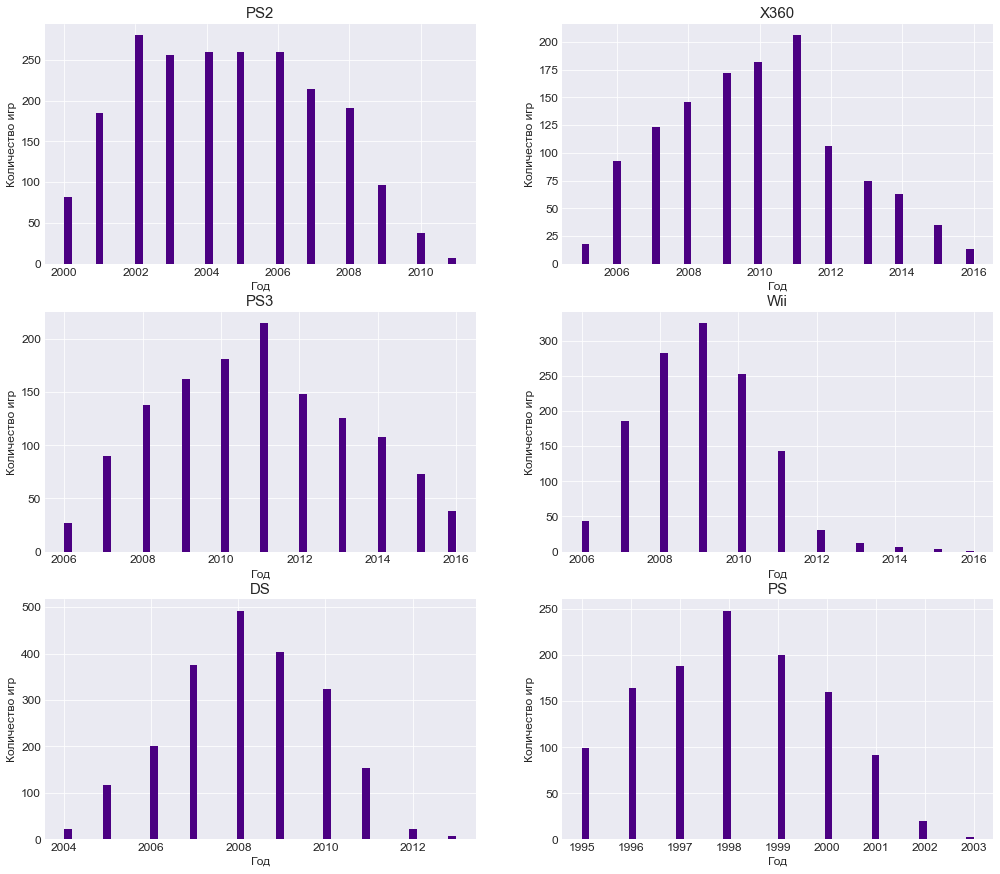

In [23]:
plt.figure(figsize=(17,15)) 
x = 1
for e in popular_platform.index[:6]:
    plt.subplot(3,2,x)
    df.query('platform == @e')['year_of_release'].plot(kind = 'hist', 
                                                      bins = 50,
                                                     color = 'indigo',
                                                       fontsize = 10)
    plt.title(e, fontsize=15)
    plt.ylabel('Количество игр', fontsize = 12)
    plt.xlabel('Год', fontsize = 12)
    plt.tick_params(axis='both', which='major', labelsize=12)
    x+=1

Построим еще один график, чтобы увидеть общую картину

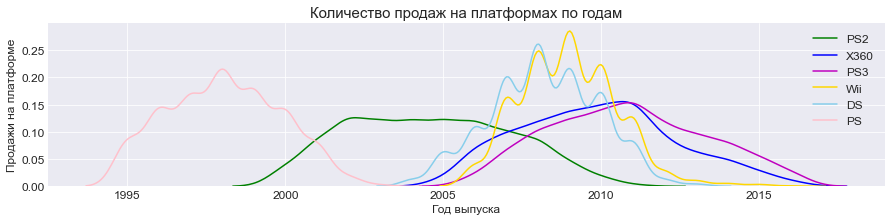

In [24]:
plt.figure(figsize=(15,3)) 
x = 0
color = ['g', 'b', 'm', 'gold', 'skyblue', 'pink', 'peru']
for e in popular_platform.index[:6]:
    sns.kdeplot(df.query('platform == @e')['year_of_release'], 
                            label=e, alpha=1,                      
                            color = color[x])
    x+=1
plt.ylabel('Продажи на платформе', fontsize=12)
plt.xlabel('Год выпуска', fontsize=12)
plt.legend(prop={'size': 12})
plt.title('Количество продаж на платформах по годам', fontsize=15)
plt.tick_params(axis='both', which='major', labelsize=12)
plt.show()


Проанализируем каждую платформу

1. **PS2**  2000-2011 годы активности, пик с 2002 по 2006
2. **Х360**  2005-2016, пик в 2011
3. **PS3**  2006-2016, пик в 2011
4. **Wii**  2006-2016, пик в 2009
5. **DS**  2004-2013, пик в 2008
6. **PS**  1994-2003, пик в 1998


Можно выстроить последовательность появления плафторм:
1. PS
2. PS2
3. DS
4. Wii
5. PS3
6. X360

Выводы
1. Пик популярности продаж игр (самые высокие продажи на платформах) приходится на 2007-2010 года
2. До 2004 года в основном игры выходили на одной, максимум двух платформах
3. Начиная с 2005 года игры начали выходить на трех и более платформах
4. В среднем платформы популярны и востребованы около 9-11 лет, потом их сменяют новые.


### Определение актаульного периода для анализа данных

Необходимо разработать рекламную кампанию на 2017 год, поэтому для анализа возьмем период с 2013 по 2016. Таким образом получится отследить последние тенденции, но не затронуть устаревшие тренды

In [25]:
df = df[df['year_of_release'] > 2012] 
df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97,8.2,M,21.05
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97,8.1,M,16.27
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,<NA>,NaN,missed,14.63
33,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,<NA>,NaN,missed,14.60
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97,8.3,M,12.62


### Анализ платформ на актуальный период

Найдем топ платформ по суммарным продажам, учитывая смену рассматриваемого периода времени

In [26]:
platform = df.groupby('platform')['total_sales'].sum().sort_values(ascending=False) 
platform.head()

platform
PS4     314.14
PS3     181.43
XOne    159.32
3DS     143.25
X360    136.80
Name: total_sales, dtype: float64

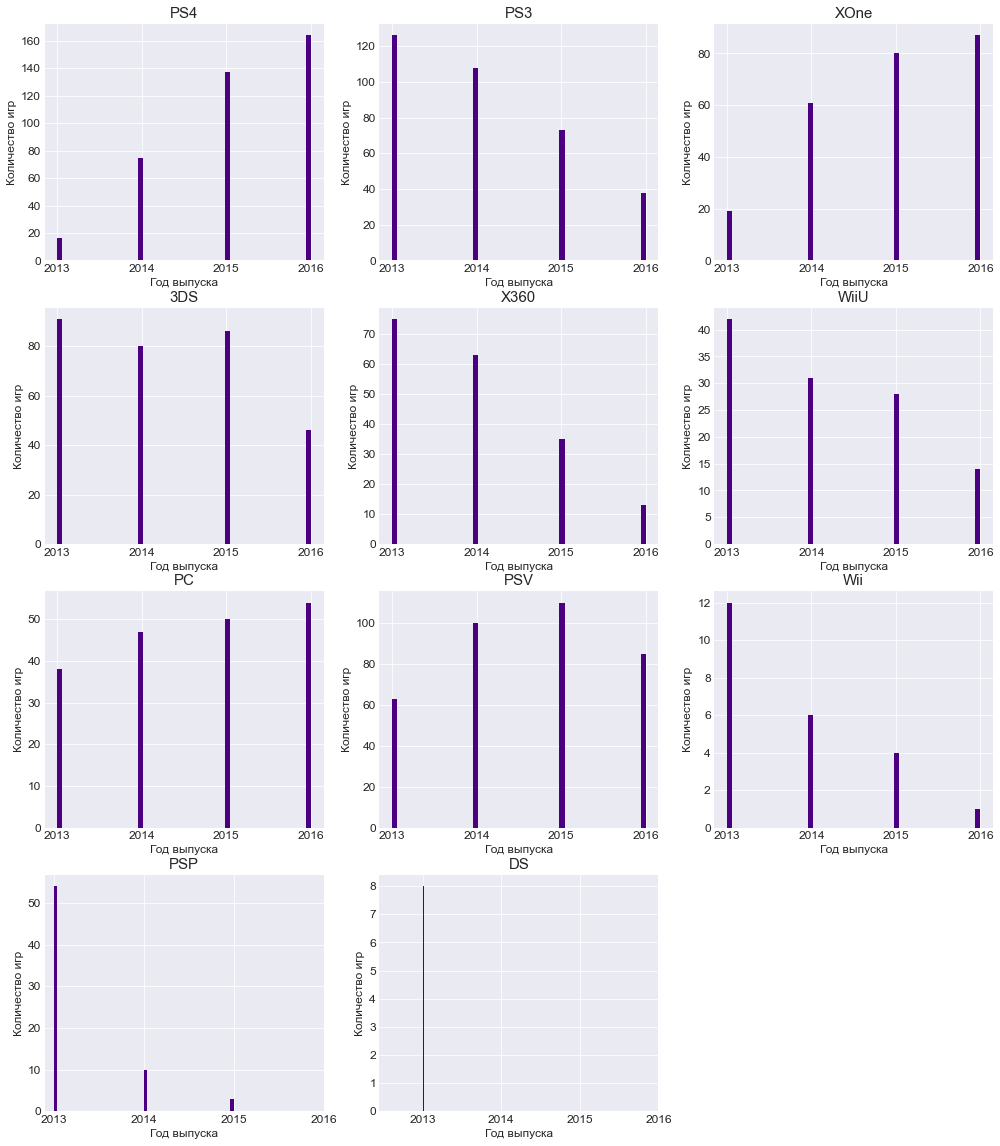

In [27]:
plt.figure(figsize=(17,20)) #посотроим распределение по годам для топ-12 платформ
x = 1
for e in platform.index[:12]:
    plt.subplot(4,3,x)
    df.query('platform == @e')['year_of_release'].plot(kind = 'hist', 
                                                      bins = 50,
                                                     color = 'indigo')
    plt.ylabel('Количество игр', fontsize = 12)
    plt.xlabel('Год выпуска', fontsize = 12)
    plt.xticks([2013,2014, 2015, 2016])
    plt.title(e, fontsize=15)
    plt.tick_params(axis='both', which='major', labelsize=12)
    x+=1
plt.show()

- продажи уже несколько лет падают на платформах PS3, X360,Wii,PSP, PS2, WiiU
- продажи растут на PS4, XOne, PC
- начинают терять свою актуальность платформы 3DS, PSV


Лидеры по продажам в последние 5 лет (2014-2016г), а также потенциально прибыльные платформы — ХOne, PS4

Построим диаграмму размаха по глобальным продажам игр в разбивке по платформам

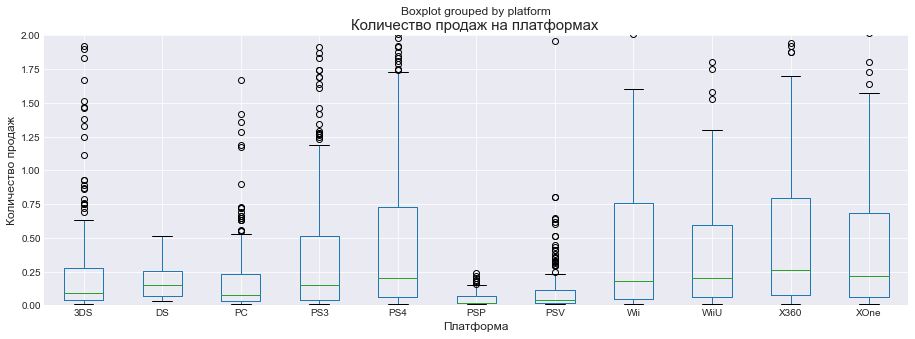

In [28]:
df.boxplot(by='platform', column='total_sales',figsize=(15,5))
plt.ylim(0, 2)

plt.title('Количество продаж на платформах ', fontsize=15)
plt.xlabel('Платформа', fontsize = 12)
plt.ylabel('Количество продаж', fontsize = 12)

plt.show()

По графику видно, что больше всего продаж на X360, XOne, PS4, WiiU, Wii
Меньше всего продаж на PSP и PSV

Больше всего вбросов (то есть успешно проданных игр в большом количестве) на платформах X360, PS3, 3DS И PS4


Меньше всего вбросов (что означает отсутсвие игр, которые были скуплены в большом тираже) на платформах PS2, PSV и DS

### Анализ влияния отзывов на продажи

Для начала посмотрим, какие оценки обычно ставят критики и пользователи

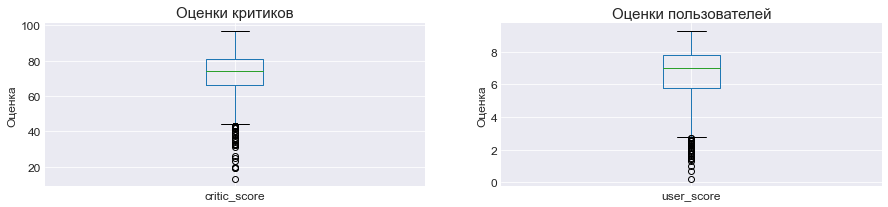

In [29]:
plt.figure(figsize=(15,3))
plt.subplot(1,2,1)
df.boxplot('critic_score')
plt.title('Оценки критиков', fontsize=15)
plt.tick_params(axis='both', which='major', labelsize=12)
plt.ylabel('Оценка', fontsize = 12)

plt.subplot(1,2,2)
df.boxplot('user_score')
plt.title('Оценки пользователей', fontsize=15)
plt.tick_params(axis='both', which='major', labelsize=12)
plt.ylabel('Оценка', fontsize = 12)

plt.show()

In [30]:
print(df['critic_score'].median())
print(df['user_score'].median())

74.0
7.0


В среднем критики ствят оценку от 60 до 80, медиана 74 (из 100)

В среднем пользователи ставят оценку от 6 до 8 баллов, медиана 7 (из 10)

У критиков и пользователей разная шкала оценивания, но по соотношению баллы проставлены пропорционально


Для дальнейшего анализа выделим лидирующие платформы по продажам и посмотрим показатели на них

In [31]:
df.groupby('platform')['total_sales'].sum().sort_values(ascending=False).head(5)

platform
PS4     314.14
PS3     181.43
XOne    159.32
3DS     143.25
X360    136.80
Name: total_sales, dtype: float64

Сравним несколько платформ

In [32]:
ps3=df.query('platform == "PS3"')
ps4 = df.query('platform == "PS4"')
x360 = df.query('platform == "X360"')
xone = df.query('platform == "XOne"')

Для сравнения построим несколько графиков корреляции

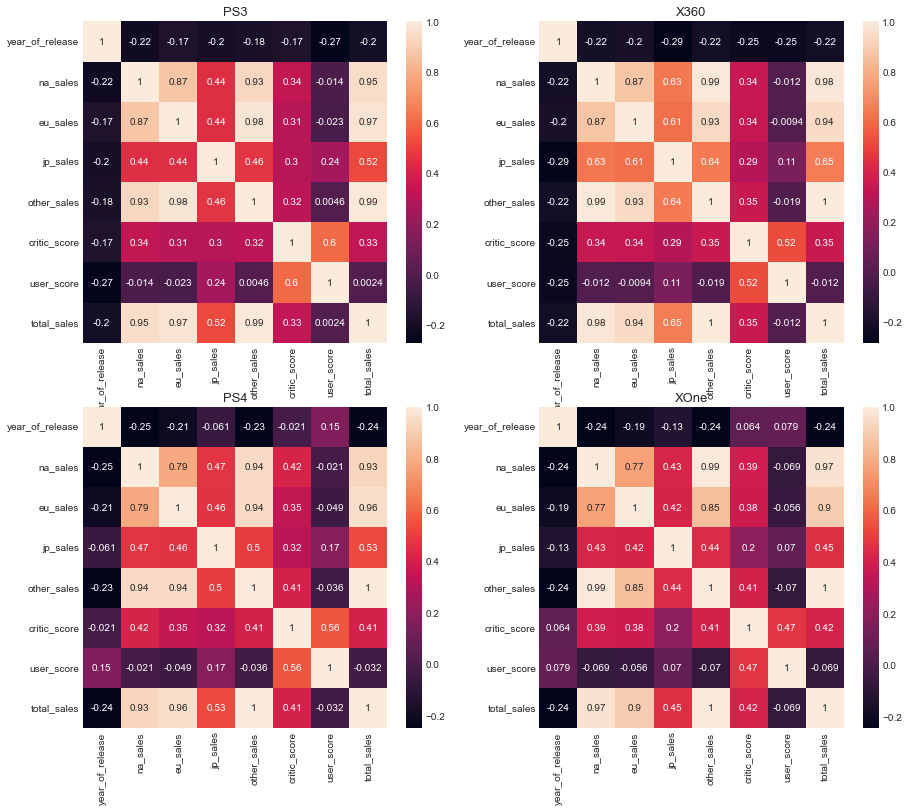

In [33]:
plt.figure(figsize=(15,13))

sp = [ps3, x360, ps4, xone]
name = ['PS3', 'X360', 'PS4', 'XOne']
for i in range(1, 5):
    plt.subplot(2,2,i)
    sns.heatmap(sp[i-1].corr(), annot= True)
    plt.title(name[i-1], fontsize=13) 

Показатели на всех четырех плафтормах схожи

Cудя по корреляции,связи между продажами и отзывами не найдено, но между продажами и оценки критиков зависимость намного выше, по сравнению продаж с оценкой пользователей.

Между отзывами критиков и пользователей есть небольшая зависимость, показаетель равен около 0.5

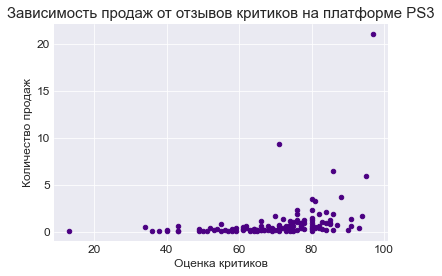

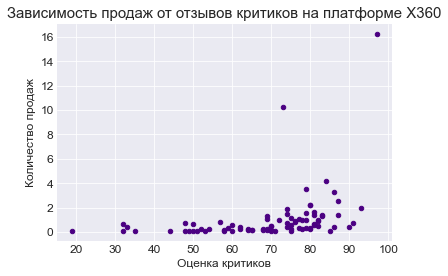

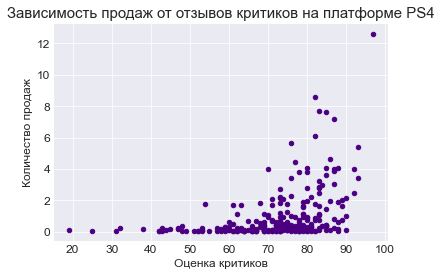

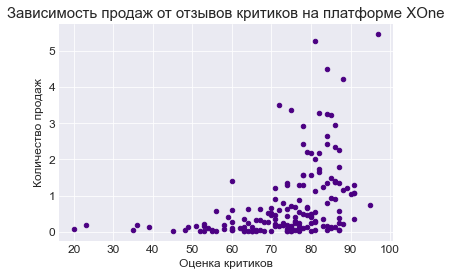

In [34]:
for i in range(4):
    sp[i].plot(kind='scatter', y='total_sales', x = 'critic_score', fontsize=12, color='indigo')
    plt.ylabel('Количество продаж', fontsize=12)
    plt.xlabel('Оценка критиков', fontsize=12)
    plt.title(f'Зависимость продаж от отзывов критиков на платформе {name[i]}', fontsize=15);

Мы построили диаграммы зависимости количества продаж от отзывов критиков по каждой платформе.

Зависимость продаж и отзывов на платформах пропорциональна. Больше всего продаж у игр с высокими оценками. Но высокий рейтинг не всегда гарантирует большие продажи.

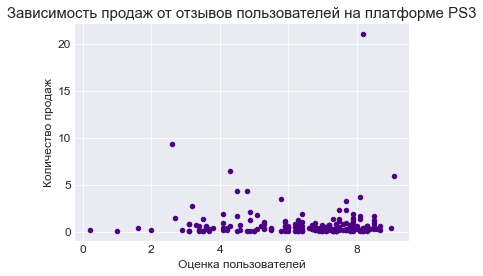

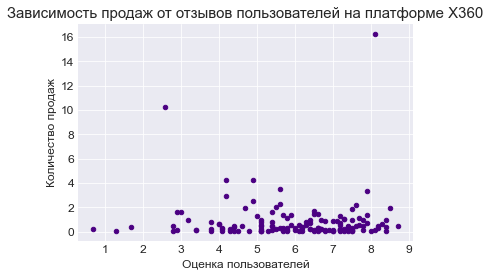

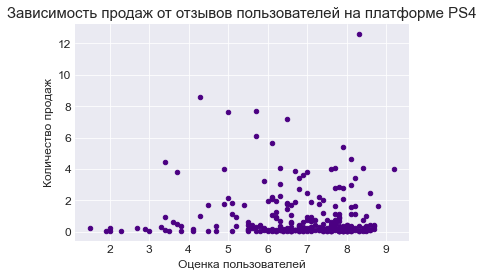

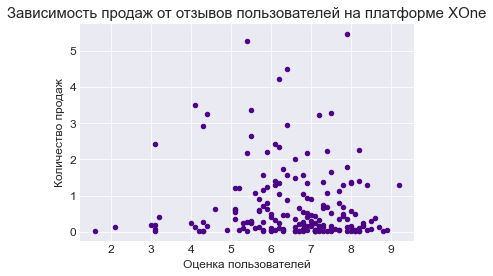

In [35]:
for i in range(4):
    sp[i].plot(kind='scatter', y='total_sales', x = 'user_score', fontsize=12, color='indigo')
    plt.ylabel('Количество продаж', fontsize=12)
    plt.xlabel('Оценка пользователей', fontsize=12)
    plt.title(f'Зависимость продаж от отзывов пользователей на платформе {name[i]}', fontsize=15);

Можно увидеть связь, что чем выше оценка пользователей - тем больше продаж у игры, но это не всегда пропорционально. ю Распределение оценок пользователей наиболее хаотично, если сравнивать с оценками критиков.Особенно хочется отметить платформой XOne, у который очень сильный разброс

Трудно по оценкам пользователей предугадать какие будут продажи

Все-таки оценки критиков более пропорциональны продажам, чем оценки критиков

Итак
- зависимость между оценкой критиков и проданными играми больше, чем между оценкой пользователей и проданными играми
- больше всего продаж у игр с высокими оценками от критиков, но хороший рейтинг от критиков не показатель выоских продаж
- отзывы пользователей слабо влияют на продажу игры


### Распределение игр по жанрам


In [36]:
genre = df.groupby('genre')['total_sales'].sum().sort_values(ascending=False)
genre

genre
Action          321.87
Shooter         232.98
Sports          150.65
Role-Playing    145.89
Misc             62.82
Platform         42.63
Racing           39.89
Fighting         35.31
Adventure        23.64
Simulation       21.76
Strategy         10.08
Puzzle            3.17
Name: total_sales, dtype: float64

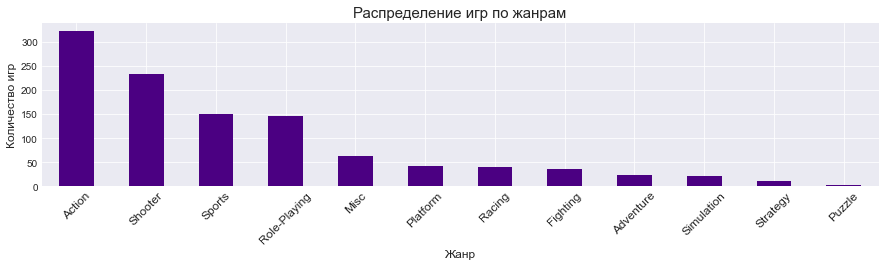

In [37]:
plt.figure(figsize=(15,3))

genre.plot(kind='bar', color='indigo')
plt.xticks(rotation=45, size=12)
plt.ylabel('Количество игр', fontsize = 12)
plt.xlabel('Жанр', fontsize = 12)
plt.title('Распределение игр по жанрам', fontsize=15)
plt.show()

В данных продажи для разных платформ, для увеличения прибыли нужны стабильные жанры, которые приносят доход независимо от платформы, то есть на которые есть устойчивый спрос, поэтому продолжим исследование

Построим диаграму размаха по жанрам

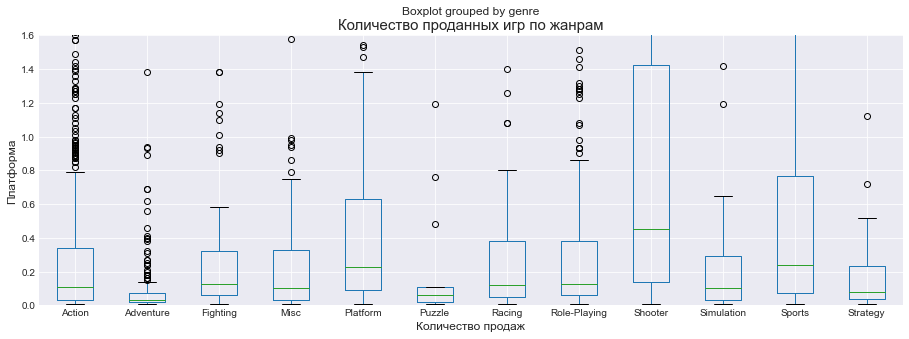

In [38]:
df.boxplot(by='genre', column='total_sales',figsize=(15,5))
plt.title('Количество проданных игр по жанрам', fontsize=15)
plt.ylabel('Платформа', fontsize = 12)
plt.xlabel('Количество продаж', fontsize = 12)
plt.ylim(0,1.6)

plt.show()

Самые популярные жанры - шутер, cпортивные игры, платформеры

У игры жанра экшн больше всего вбросов, поэтому столбчатая диаграмма не показала всей картины


Широко распространенные жанры требуют быстрого реагирования и  в них происходит интенсивный игровой процесс.

Наименее популярные жанры (пазлы, стратегии, приключения, симуляция) требует наиболее долгого погружения в игру, победа в игре в основном зависит не от скорости реакции, а от умственного потенциала игрока

**Вывод по статитистическому анализу данных**

До 1995 года выпускалось менее чем 200 игр в год, поэтому данный период нет смысла рассматривать для анализа.

Средняя продолжительность активной работы платформы - это 9-11 лет. Платформы на рынке сменяют друг друга, и, если располагать платформы в историческом порядке их работы, то они будут расположены следующим образом: PS, PS2, DS, Wii, PS3, X360.

С 2005 по 2010 года одновременно 5 платформ размещали игры (для сравнения ддо 2002 их было максимум 2)

Для анализа мы взяли игры, которые были выпущены 7 лет назад, то есть, начная с 2010 года. Так как средняя активность платформы 9-11 лет, то 7 лет - оптимальное время для рассмотрения данных.

В 2010 году на платформе DS было продано свыше 300 игр, что является рекордом на данный момент. в Последние три года (с 2014 по 2016) наиболее поплуярные платформы - PS4 и XOne, но их продажи идут волнообразно и сложно построить траекторию их дальнейшего развития.

Остальные платформы (PS3, X360,Wii, DS, PSP, PS2, WiiU) уже почти потеряли свою актуальность.

Диаграмма размаха подтверждает вышесказанные слова, а именно показывает что большинство игр продавалась на PS4. А меньше всего на PS2, DS и PSV.

Интересная ситуация с платформой XOne - на ней и нет много игр с высокими продажами, хотя выше мы ее оценили как потенциально прибыльную платформу. Возможно, она только начинает набирать обороты и поэтому на ней нет высоких продаж.

Высокие рейтинги от критиков гарантируют высокие продажи чаще, чем отзывы обчыных пользователей. Высокие продажи обычно у игр с рейтингом 80+. А четкой зависимости продаж и рейтингов от пользователей нет. Но не всегда стоит смотреть на рейтинг, так как и у высокорейтинговых игр может быть маленькое количество продаж.

Самые часто продаваемые жанры динамичны и требуют полноценного внимания и быстрой реакции. Это  шутер, спортивные игры, платформеры. Наименее популярные жанры - пазлы, стратегии, приключения, симуляция. В них нет динамики, не требуется быстрая реакция и сосредоточение внимания.

### Портрет пользователя каждого региона <a id='portrait'></a> 

In [39]:
users = ['na_sales', 'eu_sales', 'jp_sales']

In [40]:
print('Cуммарное количество проданных игр')
for e in users:
    print(e, df[e].sum())

Cуммарное количество проданных игр
na_sales 437.71
eu_sales 392.23
jp_sales 140.78000000000003


Больше всего игры пользвуются популярностью в Америке, далее идет Европа и Япония

Но такое сравнение не совсем корректно, так как данные регионы сильно отличаются по своей площади и плотностью населения

**Топ популярных платформ**

In [41]:
top_platform = df.pivot_table(index = 'platform', values=['jp_sales','eu_sales','na_sales' ], aggfunc = 'sum').sort_values(by='na_sales', ascending = False)
top_platform #продажи на каждой платформе в каждом регионе

,eu_sales,jp_sales,na_sales
platform,,,
PS4,141.09,15.96,108.74
XOne,51.59,0.34,93.12
X360,42.52,0.51,81.66
PS3,67.81,23.35,63.50
3DS,30.96,67.81,38.20
WiiU,19.85,10.88,29.21
PC,25.36,0.00,11.11
Wii,5.93,0.05,6.56
PSV,6.10,18.59,5.04


Для дальнейшей рабты уберем строки, в которых на платформе во всех трех странах не больше 9 млн продаж

In [42]:
top_platform = top_platform.query('~(eu_sales < 9 and eu_sales < 9 and jp_sales < 9)')
top_platform

,eu_sales,jp_sales,na_sales
platform,,,
PS4,141.09,15.96,108.74
XOne,51.59,0.34,93.12
X360,42.52,0.51,81.66
PS3,67.81,23.35,63.50
3DS,30.96,67.81,38.20
WiiU,19.85,10.88,29.21
PC,25.36,0.00,11.11
PSV,6.10,18.59,5.04


Добавим в таблицу доли продаж:

In [43]:
for e in users:
    top_platform[e[:2] + '_share_%'] = round(top_platform[e]*100 / top_platform[e].sum())
top_platform

,eu_sales,jp_sales,na_sales,na_share_%,eu_share_%,jp_share_%
platform,,,,,,
PS4,141.09,15.96,108.74,25.0,37.0,12.0
XOne,51.59,0.34,93.12,22.0,13.0,0.0
X360,42.52,0.51,81.66,19.0,11.0,0.0
PS3,67.81,23.35,63.50,15.0,18.0,17.0
3DS,30.96,67.81,38.20,9.0,8.0,49.0
WiiU,19.85,10.88,29.21,7.0,5.0,8.0
PC,25.36,0.00,11.11,3.0,7.0,0.0
PSV,6.10,18.59,5.04,1.0,2.0,14.0


Рассмотрим каждую страну отдельно. Напишем функцию для анализа

In [44]:
def platforms(region):
    
    ''' Функция принимает название региона, выводит показатели этого региона и столбчатую диаграмму'''
    
    print(top_platform.loc[:,[region, region[:2] + '_share_%']].head(7))
    
    plt.figure(figsize=(15,3))
    plt.bar(top_platform.index, top_platform[region], color = 'indigo', alpha = 0.5)
    plt.title(f'Платформы в {region[:2].upper()}', fontsize = 15)
    plt.xlabel('Платформа', fontsize=12)
    plt.ylabel('Количество проданных игр', fontsize=12)
    plt.tick_params(axis='both', which='major', labelsize=12)
    plt.show()

          na_sales  na_share_%
platform                      
PS4         108.74        25.0
XOne         93.12        22.0
X360         81.66        19.0
PS3          63.50        15.0
3DS          38.20         9.0
WiiU         29.21         7.0
PC           11.11         3.0


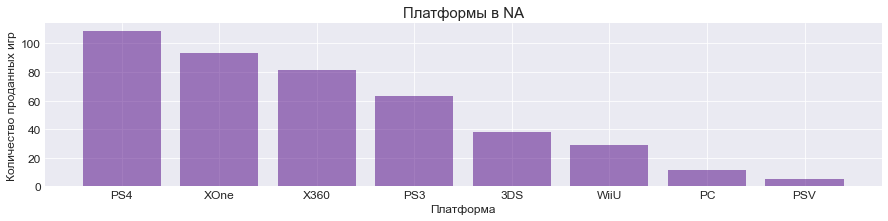

In [45]:
platforms('na_sales')


Самые популярные платформы в Северной Америке (в скобках указаны доли продаж):

- PS4 (25%)
- XOne (22%)
- X360 (19%)
- PS3 (15%)
- 3DS(9%)


          eu_sales  eu_share_%
platform                      
PS4         141.09        37.0
XOne         51.59        13.0
X360         42.52        11.0
PS3          67.81        18.0
3DS          30.96         8.0
WiiU         19.85         5.0
PC           25.36         7.0


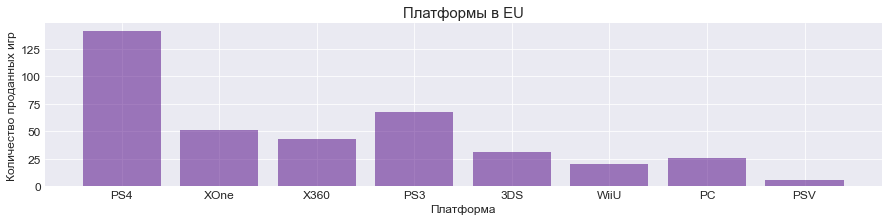

In [46]:
platforms('eu_sales')


Самые популярные платформы в Европе (в скобках указаны доли продаж):

- PS4 (37%)
- PS3 (18%)
- XOne (13%)
- X360 (11%)
- 3DS (8%)
37% всех игр покупают на плафторме PS4, также популярны PS3(18%) и XOne(13%)

Рассмотрим Японию

          jp_sales  jp_share_%
platform                      
PS4          15.96        12.0
XOne          0.34         0.0
X360          0.51         0.0
PS3          23.35        17.0
3DS          67.81        49.0
WiiU         10.88         8.0
PC            0.00         0.0


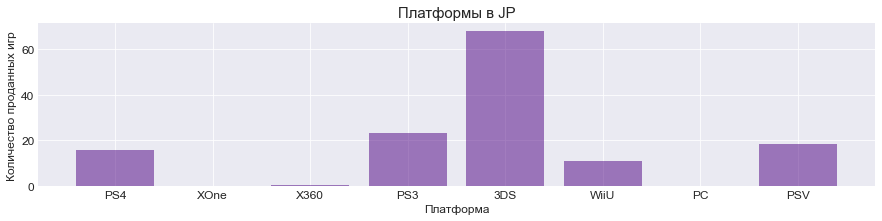

In [47]:
platforms('jp_sales')


Самые популярные платформы в Японии (в скобках указаны доли продаж):

- 3DS(49%)
- PS3 (17%)
- PSV (14%)
- PS4(12%)
- WiiU (8%)

Половину игр в Японии покупают на платформе 3DS, популярные плафтормы Японии отличаются от Европы и Америки

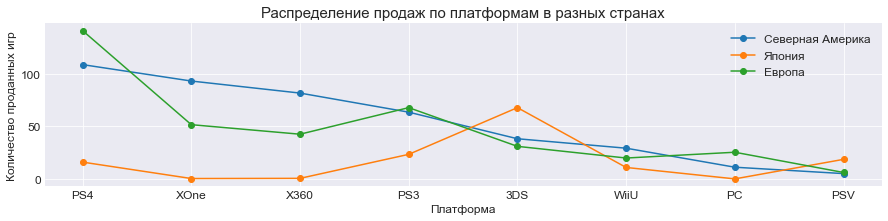

In [48]:
plt.figure(figsize=(15,3))
plt.plot(top_platform['na_sales'], 'o-', label = 'Северная Америка')
plt.plot(top_platform['jp_sales'], 'o-', label = 'Япония')
plt.plot(top_platform['eu_sales'], 'o-', label = 'Европа')
plt.tick_params(axis='both', which='major', labelsize=12)
plt.legend()
plt.legend(prop={'size': 12})
plt.title('Распределение продаж по платформам в разных странах', fontsize = 15)

plt.xlabel('Платформа', fontsize=12)
plt.ylabel('Количество проданных игр', fontsize=12)
plt.tick_params(axis='both', which='major', labelsize=12)

plt.show()

Вывод по платформам:

- В разных регионах популярны разные платформы
- Топ-2 платформы в каждом регионе продают  около 50% игр
- На рынке существует конкуренция между платформами


**Проанализируем популярные жанры**

In [49]:
top_genre = df.pivot_table(index = 'genre',  values=['jp_sales','eu_sales','na_sales' ], aggfunc = 'sum')
top_genre

,eu_sales,jp_sales,na_sales
genre,,,
Action,118.13,40.49,126.05
Adventure,8.25,5.82,7.14
Fighting,8.55,7.65,15.55
Misc,20.04,9.20,27.49
Platform,15.58,4.79,18.14
Puzzle,1.00,1.18,0.83
Racing,20.19,2.30,12.96
Role-Playing,36.97,51.04,46.40
Shooter,87.86,6.61,109.74


In [50]:
for e in users:
    top_genre[e[:2] + '_share_%'] = round(top_genre[e]*100 / top_genre[e].sum())
top_genre

,eu_sales,jp_sales,na_sales,na_share_%,eu_share_%,jp_share_%
genre,,,,,,
Action,118.13,40.49,126.05,29.0,30.0,29.0
Adventure,8.25,5.82,7.14,2.0,2.0,4.0
Fighting,8.55,7.65,15.55,4.0,2.0,5.0
Misc,20.04,9.20,27.49,6.0,5.0,7.0
Platform,15.58,4.79,18.14,4.0,4.0,3.0
Puzzle,1.00,1.18,0.83,0.0,0.0,1.0
Racing,20.19,2.30,12.96,3.0,5.0,2.0
Role-Playing,36.97,51.04,46.40,11.0,9.0,36.0
Shooter,87.86,6.61,109.74,25.0,22.0,5.0


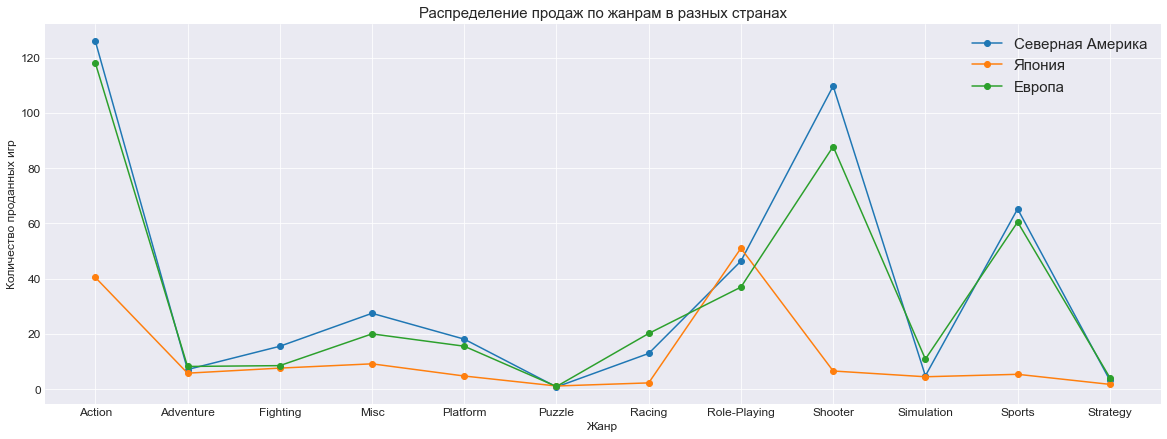

In [51]:
plt.figure(figsize=(20,7))
plt.plot(top_genre['na_sales'], 'o-', label = 'Северная Америка')
plt.plot(top_genre['jp_sales'], 'o-', label = 'Япония')
plt.plot(top_genre['eu_sales'], 'o-', label = 'Европа')
plt.tick_params(axis='both', which='major', labelsize=12)
plt.legend()
plt.legend(prop={'size': 15})
plt.title('Распределение продаж по жанрам в разных странах', fontsize = 15)


plt.xlabel('Жанр', fontsize=12)
plt.ylabel('Количество проданных игр', fontsize=12)
plt.tick_params(axis='both', which='major', labelsize=12)

plt.show()

Выведем для каждого региона топ-3 жанра

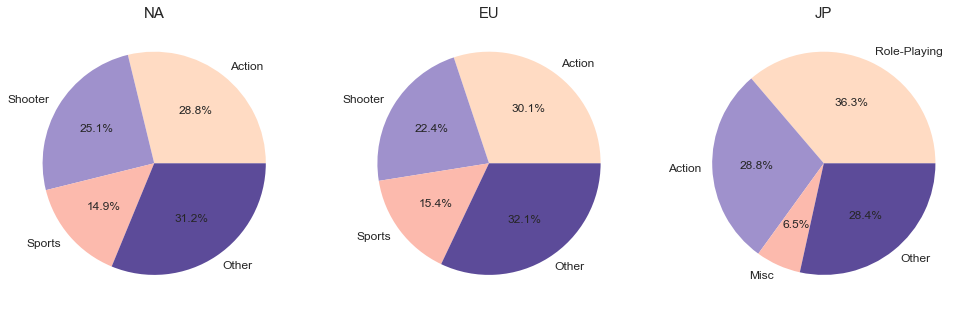

In [52]:
region = ['na_sales', 'eu_sales', 'jp_sales']
plt.figure(figsize=(17,9))
x=1
for e in region:
    plt.subplot(1,3,x)
    genre = top_genre.sort_values(by=e, ascending=False).reset_index()

    genre = genre.sort_values(by=e, ascending=False)
    sum_other = genre.loc[5:][e].sum()

    top_3 = genre[:3]

    new_row = {'genre':'Other', e:genre.loc[3:][e].sum()}
    top_3= top_3.append(new_row, ignore_index=True)
    plt.title(e[:2].upper(), fontsize = 15)
    x+=1

    plt.pie(labels=top_3['genre'], x = top_3[e], autopct='%1.1f%%', colors=['#FFDBC3','#9F91CC','#FCBAAD', '#5C4B99'], textprops={'fontsize': 12})

В основном самые популярные жанры отличаются динамичностью (экшн, спорт, шутеры, аркады).
В Европе и Америке очень похожи популярные жанры.

В Японии в топ выходят ролевые игры

Топ-2 популярных жанра составляют более 50% от всего рынка в регионе


**Анализ ESRB**

In [53]:
esbr = df.pivot_table(index='rating', values = ['na_sales', 'eu_sales', 'jp_sales'], aggfunc = 'sum')
esbr

,eu_sales,jp_sales,na_sales
rating,,,
E,83.36,15.14,79.05
E10+,42.69,5.89,54.24
M,145.32,14.11,165.21
T,41.95,20.59,49.79
missed,78.91,85.05,89.42


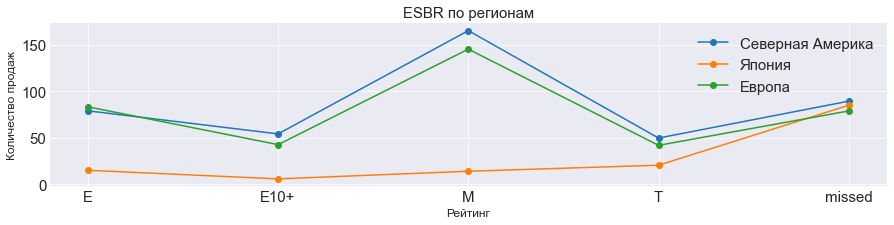

In [54]:
plt.figure(figsize=(15,3))
plt.plot(esbr.index, esbr['na_sales'], 'o-', label = 'Северная Америка')
plt.plot(esbr.index, esbr['jp_sales'], 'o-', label = 'Япония')
plt.plot(esbr.index, esbr['eu_sales'], 'o-', label = 'Европа')

plt.title('ESBR по регионам', fontsize = 15)
plt.legend(prop={'size': 15})


plt.xlabel('Рейтинг', fontsize=12) 
plt.ylabel('Количество продаж', fontsize=12) 
plt.tick_params(axis='both', which='major', labelsize=15)


plt.show()

Большинство игр на рынке имеют рейтинг M (mature 17+)

Далее по популярности идут игры с рейтингом E (everyone) и Т (teen)

И менее популярны игры с рейтингом E10+(everyone 10+)



Графики между собой похожи. Видно, что у Европы и Северной Америки почти одинаковое соотношение по рейтингам.

У Японии нет сильного различия по продажам в зависимости от рейтинга. Стоит отметить, что в Японии игры с рейтингом М менее популярны, чем в Америке и Европе.

Рейтинг ESBR не влияет на продажи в отдельном регионе. Количество проданных копий в большинстве зависит от рейтинга игры и самой игры, чем от места, где продается ( небольшое исключение - Япония, где игры для mature 17+ менее востребованы)


Почти одинаковое количество игр в каждом регионе не имеют рейтинга ESBR

In [55]:
def portrait(region):
    
    '''Функция принимает название региона и выводит три графика, отображающие топ платформ, жанров и рейтингов игр'''
    
    plt.figure(figsize=(20,5))
    plt.subplot(1,3,1)
    plt.bar(top_platform.index[:8], top_platform[region][:8], color = 'indigo', alpha = 0.5)
    plt.title('Популярные платформы', fontsize=18)
    plt.ylabel('Количество продаж', fontsize=15)
    plt.tick_params(axis='both', which='major', labelsize=15)

    plt.subplot(1,3,2)
    plt.bar(top_genre.index, 
        top_genre[region], 
        color = '#FFDBC3', 
        linewidth = 100)
    plt.xticks(rotation=45)
    plt.title('Популярные жанры', fontsize=18)
    plt.tick_params(axis='both', which='major', labelsize=13)


    plt.subplot(1,3,3)
    plt.bar(esbr.index, 
        esbr[region], 
        color = 'indigo', 
        linewidth = 100)
    plt.title('Популярные рейтинги', fontsize=18)

    plt.tick_params(axis='both', which='major', labelsize=15)
    plt.show()

Ситуация на рынке в Северной Америке

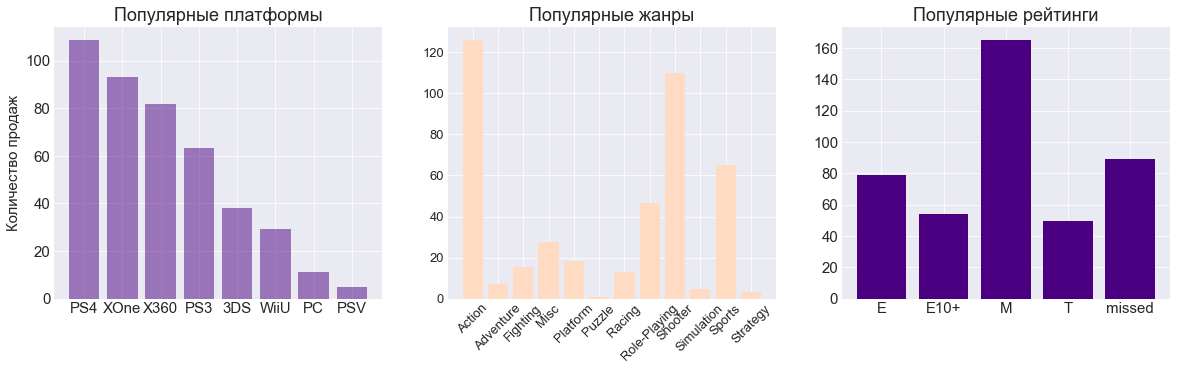

In [56]:
portrait('na_sales')

Обычно пользователь приобретает игры на данных платформах:

- PS4 
- XOne
- X360
- PS3

В основном он играет в экшн, спортивные игры, шутеры, аркады и гонки. То есть что-то динамичное, быстрое, что требует концентрации

В основном это игры, которые не имеют возрастных ограничений. Иногда он играет в игры, которые предназначены для тинейджеров или строго 17+

Портрет пользователя из Европы

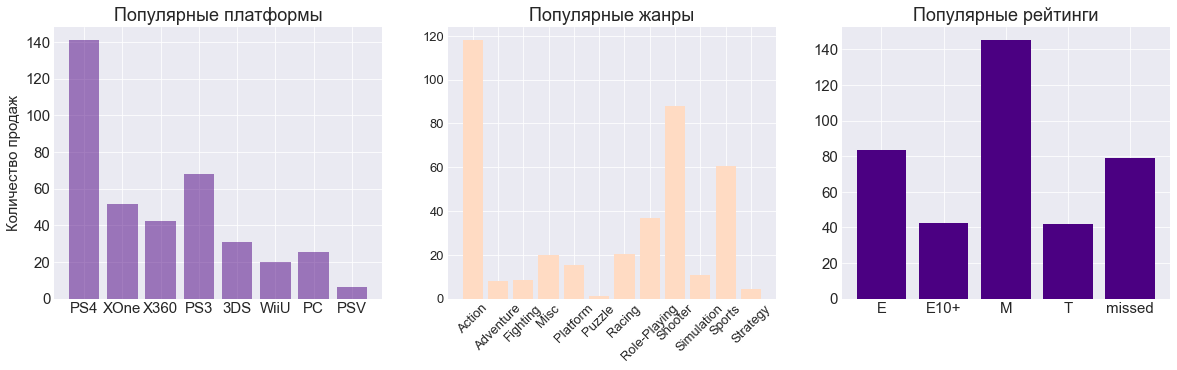

In [57]:
portrait('eu_sales')

Обычно пользователь приобретает игры на данных платформах:

- PS4
- PS3
- XOne
- X360 

В основном он играет в экшн, спортивные игры, шутеры, аркады и гонки.Его вкусы совпадают с северо-американским пользователем.
Аналогично, в основном он играет в  игры, которые не имеют возрастных ограничений. Но иногда и в те,которые предназначены для тинейджеров или строго 17+

Портрет пользователя из Японии

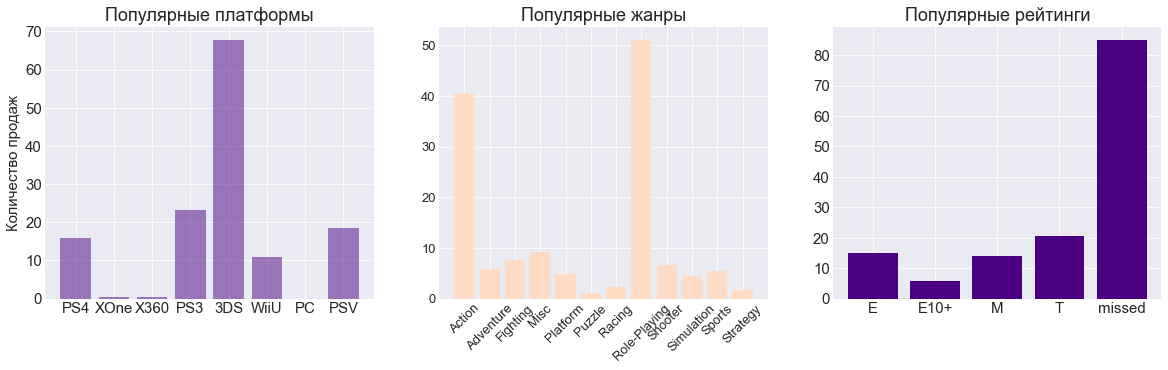

In [58]:
portrait('jp_sales')

Пользователь весьма своеобразен по сравнению с жителем северной Америки или Европы

Обычно пользователь приобретает игры на данных платформах:


- 3DS
- PS3 
- PSV
- PS4

В Японии не очень популярна платформа Wii, хотя в других двух регионов она была на 3 и 4 месте по популярности

В основном (почти 30% от всех игр) пользователь играет в ролевые игры (что вообще не популярно в Америке и Европе). А остальной набор жанров (экшн, спорт, аркады) - уже совпадает с набором американского или европейского пользователя


Большинство игр не имеют строгие рамки и имеют рейтинг Е. Но, в сравнении с другими регионами можно отметить, что в Японии игры с рейтингом 17+ пользуются меньшей популярностью

Выводы по портретам пользователей каждого региона

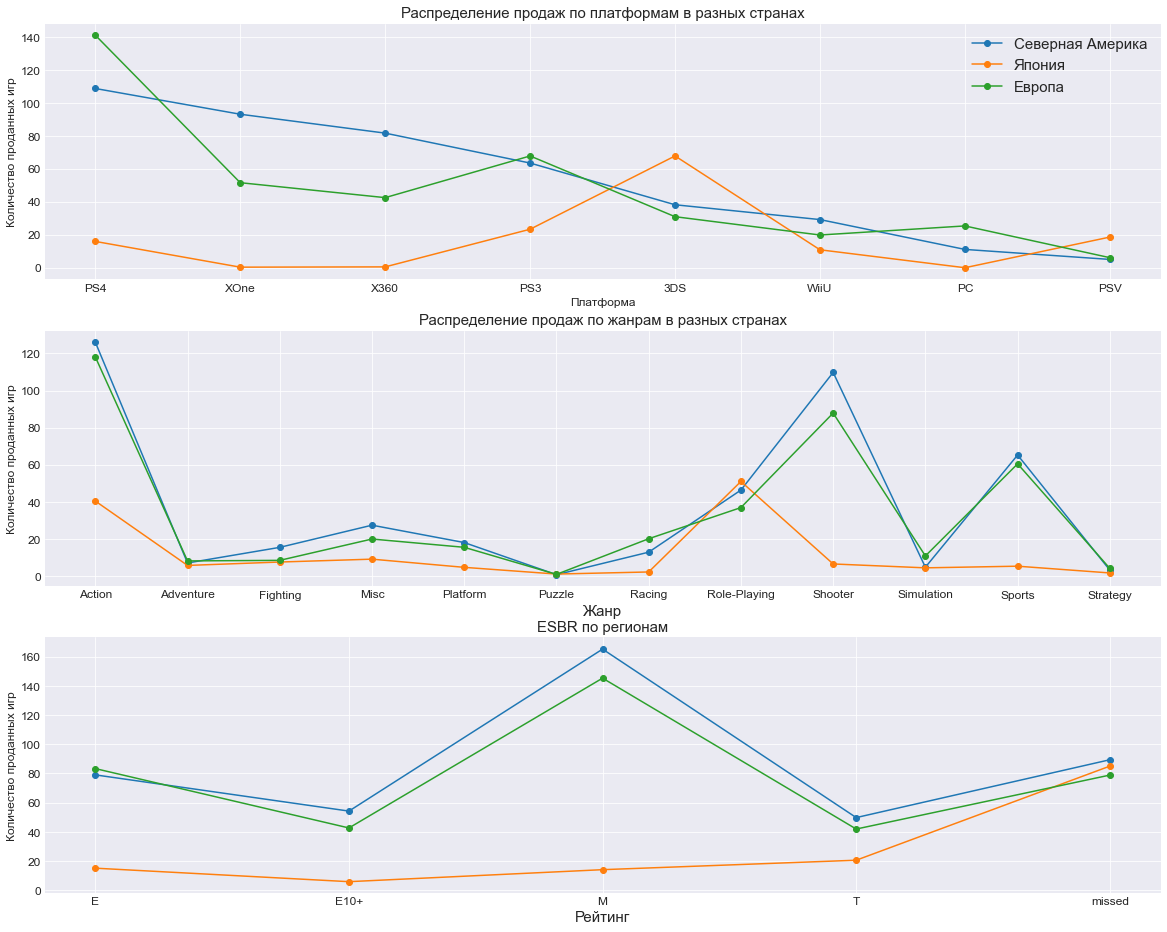

In [59]:
plt.figure(figsize=(20,16))


plt.subplot(3,1,1)
plt.plot(top_platform['na_sales'], 'o-', label = 'Северная Америка')
plt.plot(top_platform['jp_sales'], 'o-', label = 'Япония')
plt.plot(top_platform['eu_sales'], 'o-', label = 'Европа')
plt.tick_params(axis='both', which='major', labelsize=16)
plt.legend(prop={'size': 15})
plt.title('Распределение продаж по платформам в разных странах', fontsize = 15)
plt.xlabel('Платформа', fontsize=12)
plt.ylabel('Количество проданных игр', fontsize=12)
plt.tick_params(axis='both', which='major', labelsize=12)


plt.subplot(3,1,2)
plt.plot(top_genre['na_sales'], 'o-', label = 'Северная Америка')
plt.plot(top_genre['jp_sales'], 'o-', label = 'Япония')
plt.plot(top_genre['eu_sales'], 'o-', label = 'Европа')
plt.tick_params(axis='both', which='major', labelsize=12)
plt.title('Распределение продаж по жанрам в разных странах', fontsize = 15)
plt.xlabel('Жанр', fontsize=15)
plt.ylabel('Количество проданных игр', fontsize=12)
plt.tick_params(axis='both', which='major', labelsize=12)


plt.subplot(3,1,3)
plt.plot(esbr.index, esbr['na_sales'], 'o-', label = 'Северная Америка')
plt.plot(esbr.index, esbr['jp_sales'], 'o-', label = 'Япония')
plt.plot(esbr.index, esbr['eu_sales'], 'o-', label = 'Европа')
plt.title('ESBR по регионам', fontsize = 15)
plt.xlabel('Рейтинг', fontsize=15) 
plt.ylabel('Количество проданных игр', fontsize=12) 
plt.tick_params(axis='both', which='major', labelsize=12)


plt.show()

Количество проданных игр в разных странах:
 - Северная Америка 1130.41 млн копий
 - Европа 841.21 млн копий
 - Япония 305.14 млн копий
 
Будет интересно посчитать соотношение количества проданных игр к населению региона (в млн).
- В Северной Америке это 1130/580 = **1.9**
- В Европе 841/748 = **1.1**
- В Японии 305/125 = **2.44**

То есть, хоть в Северной Америке и больше продаж игр, но в Японии на одного жителя приходится больше купленных игр. Далее идет Северная Америка и Европа



**Америка**

Популярные платформы: PS4(25%), XOne(22%), X360(19%), PS3, Wii, 3DS 

Популярные жанры: экшн(29%), шутер(25%), спорт(15%), ролевые игры, аркады и гонки

Рейтинги популярных игр: 17+ и everyone


**Европа**

Популярные платформы: PS4(37%), PS3(18%) ,XOne(13%), X360(11%),  3DS, PC, WiiU

Популярные жанры: экшн(30%), шутер(22%), спорт(15%), ролевые игры, аркады

Рейтинги популярных игр: 17+ и everyone

**Япония**

Популярные платформы: 3DS(49%), PS3(17%), PSP(12%), WiiU

Популярные жанры: ролевые игры(36%), экшн(29%), шутер(7%), аркады, сражения

Рейтинги популярных игр: нет ярко выраженных отличий в рейтинге, но лидируют everyone и teen



Пользователи Америки и Европы похожи между собой по предпочтениям, Япония в этом плане более самобытна и отличается от данных регионов 

### Проверка гипотез <a id='hypothesis'></a> 

Для тестирования будем использовать двусторонний t-тест Стьюдента, уровень значимости определим в 5%, напишем функцию

In [60]:
def hypothesis(x,y):
    
    '''функция принимает выборки данных из двух групп и выводит результат о гипотезе'''
    alpha = .05

    res = st.ttest_ind(x, y)

    print('p-значение:', res.pvalue) 

    if res.pvalue < alpha:
        print("Отвергаем нулевую гипотезу")
    else:
        print("Не получилось отвергнуть нулевую гипотезу")


Первая гипотеза

- Нулевая гипотеза: средние пользовательские рейтинги платформ Xbox One и PC одинаковые

- Альтернативная гипотеза: средние пользовательские рейтинги платформ Xbox One и PC разные


In [61]:
xone = df.query('platform=="XOne" & ~(user_score.isna())')['user_score']
pc = df.query('platform=="PC" & ~(user_score.isna())')['user_score']

hypothesis(xone, pc)

p-значение: 0.14012658403611647
Не получилось отвергнуть нулевую гипотезу


Вторая гипотеза

    
- Нулевая гипотеза: средние пользовательские рейтинги жанров Action и Sports  одинаковые

- Альтернативная гипотеза: средние пользовательские рейтинги жанров Action и Sports разные

In [62]:
action = df.query('genre=="Action" & ~(user_score.isna())')['user_score']
sports = df.query('genre=="Sports" & ~(user_score.isna())')['user_score']

hypothesis(action, sports)

p-значение: 1.0517832389140023e-27
Отвергаем нулевую гипотезу


На имеющихся данных, на уровне значимости 5%:
- нет оснований отвергать нулевую гипотезу о равенстве средних значений пользовательских рейтингов платформ Xbox One и PC 
- есть основания отвергнуть нулевую гипотезу о равенстве средних значений пользовательских рейтингов (отзывов) жанров Action и Sports в пользу альтернативной гипотезы

### Вывод  <a id='conclusion'></a> 

Следует помнить, что платформа в среднем актуальна 9-11 лет и стоит для выпуска брать новые платформы, которые начинают развиваться. Мы выделили такие как PS4 и XOne

Высокий рейтинг - не 100% гарантия высоких продаж. Но в рекламной кампании стоит указать рейтинг, который поставили критики, так как высокие продажи именно у игр с высоким рейтингом критиков

Рейтинг пользователей сильно на продажи не влияет

Как правило, люди предпочитают динамичные игры, например экшн, шутер, спортивные игры, ролевые и аркады. Наименее популярны пазлы, стратегия.

Продукт нужно создавать специально под целевую аудиторию. Тут стоит отметить, что Япония по своим любительским характеристикам отличается от Европы и Америки.

Если выпускать игру в Америке и Европе, то стоит обратить внимание на следующие показатели:
- по жанрам лидирует экшн и шутер
- популярные платформы PS3 и Х360 (но они начинают устаревать и с каждым годом продаж меньше, необходимо менять платформы и обратить внимание на потенциально прибыльные)
- обычно играют в игры с рейтингом everyone и 17+ (то есть нет широкой специфичной публики, которая предпочитает игры для взрослых (жестокие) или, наоборот, для детей)

Если речь о Японии, то можно выделить следующее:

- популярные жанры - ролевые игры и экшн
- самая популярная платформа 3DS, но она актуальна только в Японии. Также в топе PS3
- рейтинг игр не сильно влияет на продажи, специфичной публики нет

Итак, если делать универсальный продукт, то скорее всего 
- жанр - экшн
- платформа - PS3 (есть риск утраты актуальности). Можно попробовать сделать ставку на PS4 и X360


Краткий вывод

- Актуальные платформы - PS4, Xbox One

- Предпочтительные жанры - экшн и шутер

- Игры с рейтингом mature 17+ самые популярные

- На отзывы критиков стоит обращать внимания, но они не всегда пропорциональны продажам. 